In [1]:
import copy
import functools
import numpy as np
from time import sleep
from typing import Callable
from matplotlib import pyplot as plt
from IPython.display import update_display, display

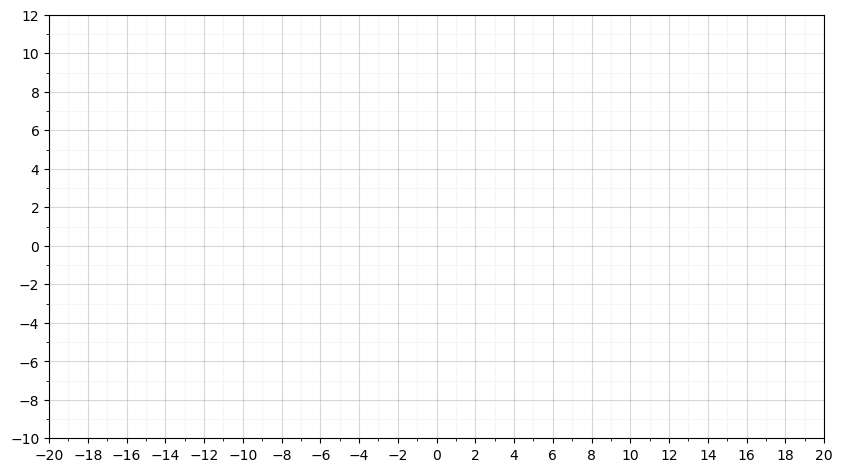

In [2]:
# Points

LABEL = 'P_'    # A label to identify the points that makes the shape

# Line Break
LB = np.array(2*[np.nan]).reshape(-1, 1)     #-> [np.nan, np.nan] : int*list means repeating the list

def fetch_labeled() -> list[str]:
    return [var for var in globals() if var.startswith(LABEL)]

def fetch_index() -> str:      # last indexed label
    return sorted(fetch_labeled())[-1]

def fetch_points() -> list[np.ndarray]:
    return [globals()[var] for var in fetch_labeled()]

def Compile() -> np.ndarray:
    points = fetch_points()

    if not len(points):
        return np.array([])

    def yielder():
        yield points[0]
        for p in points[1:]:
            yield LB
            yield p
    return np.concatenate(tuple(yielder()), 1) # hstack

def line(*points):
    # line segment, *segments
    return np.array(points).T

# - - - - - - - - - - - - - - -

# Shapes

def Poly(*points, res:int = 100):
    # points tuple
    points = line(*points)
    polyS = functools.partial(np.vander, N=points.shape[1])
    C = np.linalg.solve(polyS(points[0, :]), points[1, :])
    XY = np.empty([2, res])
    XY[0, :] = np.linspace(min(points[0, :]), max(points[0, :]), res)
    XY[1, :] = polyS(XY[0, :]) @ C
    return XY

def circle(x, y, radius, res:int= 100, T:np.ndarray | None = None) -> np.ndarray:
    T = np.linspace(0, 2*np.pi, res) if T is None else T
    XY = np.empty([2, res])
    XY[0, :] = radius*np.cos(T) + x     # x axis
    XY[1, :] = radius*np.sin(T) + y     # y axis
    return XY

def circles(*Points, radius=3, res = 100) -> list[np.ndarray]:
    T = np.linspace(0, 2*np.pi, res)
    draw = functools.partial(circle, radius = radius, T = T)
    return [XY for XY in map(lambda xy: draw(*xy), Points)]

## Rotation

def rotation_matrix(alpha) -> np.ndarray:
    return np.array([
        (np.cos(alpha), -np.sin(alpha)),
        (np.sin(alpha), np.cos(alpha))
        ])

def inDegrees(f:Callable):
    d2r = lambda alpha: alpha*np.pi/180
    @functools.wraps(f)
    def wrapped(angle):
        return f(d2r(angle))
    return wrapped

def rotate(angle):
    # angle in radiant
    M = rotation_matrix(angle)
    for p in fetch_labeled():
        globals()[p] = M @ globals()[p]

rotateD = inDegrees(rotate)

# - - - - - - - - - - - - - - -

# Canvas

x_min, x_max, y_min, y_max = -20.0, 20.0, -10.0, 12.0

XYLIM = x_min, x_max ,y_min, y_max

FIGSIZE = ((x_max-x_min)/4,(y_max-y_min)/4)

x_ticks = np.arange(x_min,x_max+1)
y_ticks = np.arange(y_min,y_max+1)

fig, ax = plt.subplots(figsize=FIGSIZE)

def Setup():
    ax.axis(XYLIM)

    ax.set_xticks(x_ticks[::2])  # Major Ticks
    ax.set_yticks(y_ticks[::2])

    ax.set_xticks(x_ticks,minor=True)
    ax.set_yticks(y_ticks,minor=True)

    ax.grid(which='minor', alpha=0.1)
    ax.grid(which='major', alpha=0.5)

Setup()

def Clear():
    ax.clear()
    Setup()

def Render(fmt = 'k', *plt_args, **plt_kwargs):
    Clear()
    ax.plot(*Compile(), fmt, *plt_args, **plt_kwargs)
    return fig

## Drawing

def mark(*points, fmt:str = 'ro', **plt_kwargs):
    P = line(*points)
    ax.plot(*P, fmt, **plt_kwargs)

## Animation

def save_fig()->dict:
    State = dict()
    for p in fetch_labeled():
        State[p] = copy.deepcopy(globals()[p])
    return State

def restore2(State:dict):
    for key, value in State.items():
        globals()[key] = value

def animateRotationDemo(Duration = 3, Revolutions = 10):
    fps = Duration/Revolutions
    alpha = 2*np.pi/Revolutions
    id = "CAR-FIG"
    display(fig, display_id=id)
    for i in range(Revolutions):
        rotate(alpha)
        sleep(fps)
        update_display(Render(), display_id=id)

# - - - - - - - - - - - - - - -

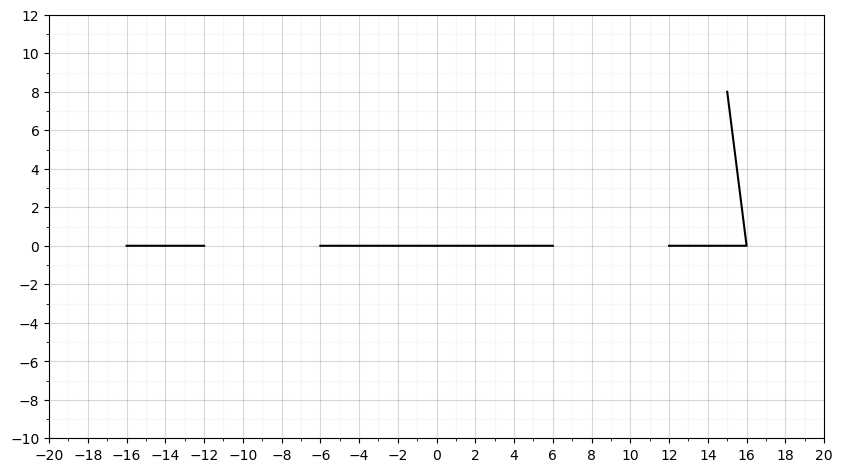

In [3]:
P_1 = line([-16, 0], [-12, 0])

P_2 = line((-6, 0), (6, 0))

P_3 = line([12, 0], [16, 0], [15, 8])

Render()

In [4]:
points = (-9, 5), (0, 9), (12, 7)

P_4 = Poly(*points)

Render()

mark(*points)

In [5]:
points = (-16,0), (-12,4), (-9,5), (0,4), (12,7), (15,8)

P_5 = Poly(*points)

Render()

mark(*points)

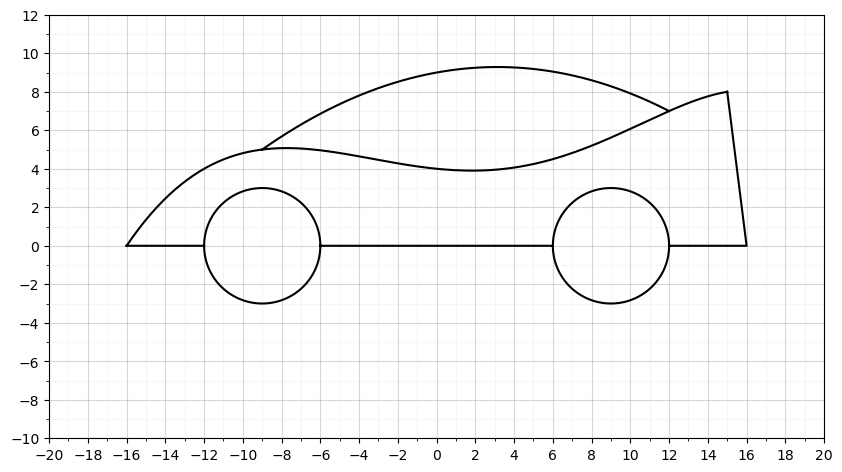

In [6]:
P_6, P_7 = circles([-9, 0], [9, 0])

Render()

In [7]:
S = save_fig()

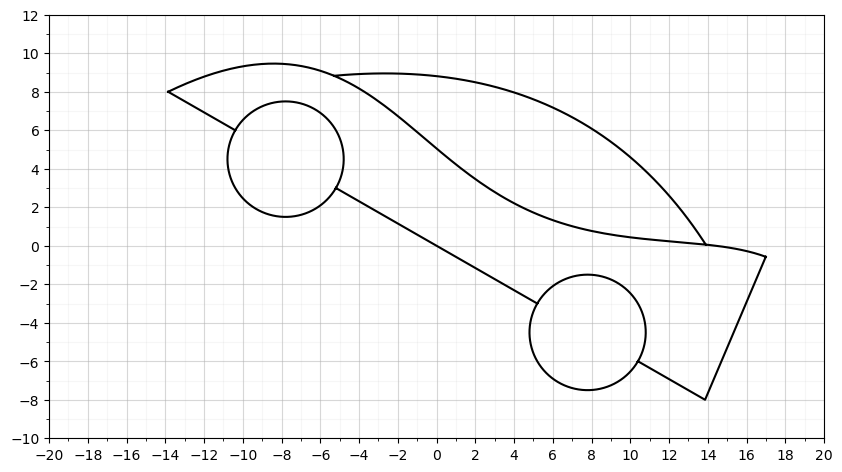

In [8]:
rotateD = inDegrees(rotate)

rotate(np.pi)

Render()

rotateD(180)
Render()

rotateD(-30)
Render()

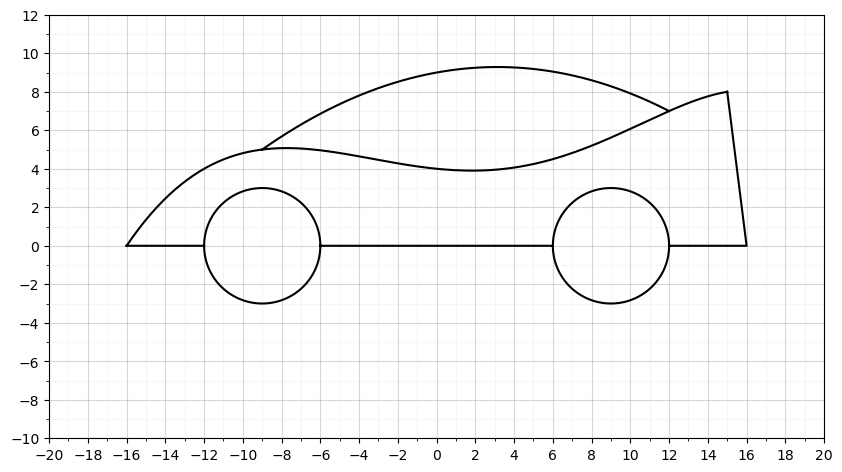

In [9]:
restore2(S)
Render()

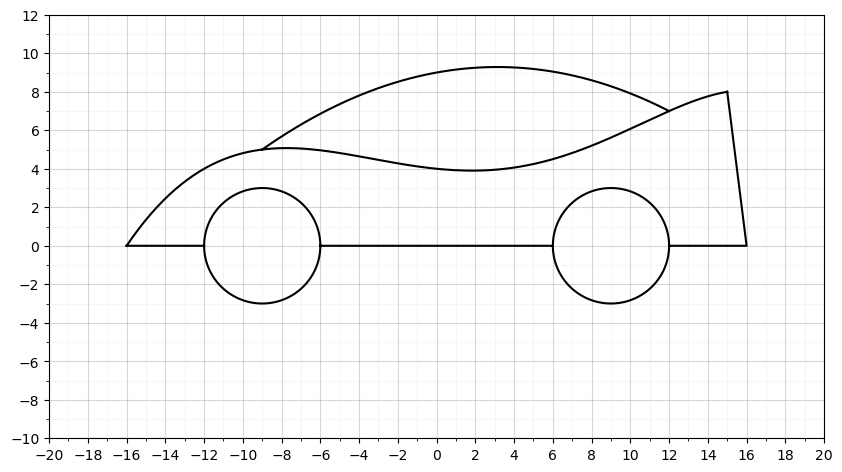

In [10]:
animateRotationDemo()